In [1]:
from datasets import load_dataset

In [2]:
from huggingface_hub import HfApi

# HfApi 인스턴스 생성
api = HfApi()

# 모든 데이터셋 리스트 가져오기 (generator를 리스트로 변환)
datasets_list = list(api.list_datasets())

# 데이터셋의 개수 출력
print(f"Total number of datasets: {len(datasets_list)}")


Total number of datasets: 224958


In [3]:
datasets_list[:1]

[DatasetInfo(id='LLM360/TxT360', author='LLM360', sha='7af09a9e7ba4565c667fd6c93cefc727bcb3bd81', created_at=datetime.datetime(2024, 10, 3, 16, 4, 34, tzinfo=datetime.timezone.utc), last_modified=datetime.datetime(2024, 10, 10, 19, 13, 53, tzinfo=datetime.timezone.utc), private=False, gated=False, disabled=False, downloads=6147, downloads_all_time=None, likes=98, paperswithcode_id=None, tags=['license:odc-by', 'region:us'], trending_score=98, card_data=None, siblings=None)]

In [4]:
emotion=load_dataset("emotion")

In [5]:
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
train_ds=emotion['train']

In [7]:
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [8]:
train_ds.column_names

['text', 'label']

In [9]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [10]:
print(train_ds[:1])

{'text': ['i didnt feel humiliated'], 'label': [0]}


In [11]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [12]:
train_ds['text'][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

In [13]:
import pandas as pd

In [14]:
emotion.set_format(type="pandas")

In [15]:
df = emotion['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [16]:
def label_int2str(row):
    return emotion["train"].features['label'].int2str(row)

df["label_name"]=df["label"].apply(label_int2str)

In [17]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


## 클래스 수 확인

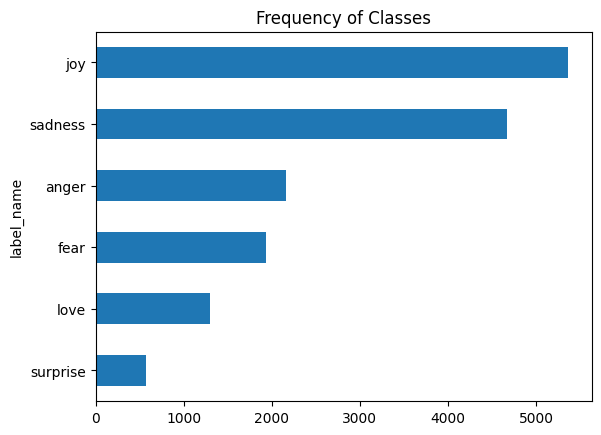

In [18]:
import matplotlib.pyplot as plt
df['label_name'].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [19]:
'''
데이터셋의 불균형이 심하게 보인다. 
1. 소수 클래스를 랜덤하게 오버 샘플링 한다.
2. 다수 클래스를 랜덤하게 언더 샘플링 한다.
3. 클래스의 대표성이 부족하다면 레이블된 데이터를 더 많이 수집한다.

>>> imbalanced-learn 라이브러리 활용(https://oreil.ly/5XBhb)
다만 훈련/테스트 분할을 만들기 전에는 샘플링 전략을 적용하면 안된다. 그렇지 않으면 분할 사이에 많은 정보가 새나간다.
일반적으로 훈련 세트에만 샘플링 전략을 사용하기 때문.

트래인, 테스트로 분할하고 트래인 데이터셋에 대해서 불균형을 해소한다.
'''

'\n데이터셋의 불균형이 심하게 보인다. \n1. 소수 클래스를 랜덤하게 오버 샘플링 한다.\n2. 다수 클래스를 랜덤하게 언더 샘플링 한다.\n3. 클래스의 대표성이 부족하다면 레이블된 데이터를 더 많이 수집한다.\n\n>>> imbalanced-learn 라이브러리 활용(https://oreil.ly/5XBhb)\n다만 훈련/테스트 분할을 만들기 전에는 샘플링 전략을 적용하면 안된다. 그렇지 않으면 분할 사이에 많은 정보가 새나간다.\n일반적으로 훈련 세트에만 샘플링 전략을 사용하기 때문.\n\n트래인, 테스트로 분할하고 트래인 데이터셋에 대해서 불균형을 해소한다.\n'

## 클래스별 길이 확인

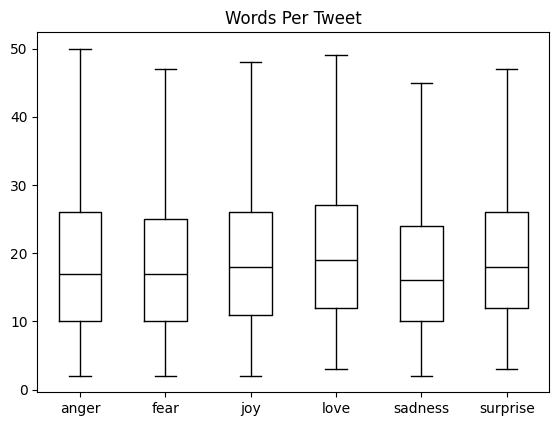

In [20]:
df['Words Per Tweet'] = df['text'].str.split().apply(len)
df.boxplot("Words Per Tweet", by= "label_name",grid = False,
          showfliers=False, color ="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

## 문자 토큰화

In [21]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [22]:
token2idx = {ch:idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [23]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


## Torch onehot

In [24]:
import torch
import torch.nn.functional as F

In [25]:
input_ids=torch.tensor(input_ids)
one_hot_encoding = F.one_hot(input_ids, num_classes=len(token2idx))
print(one_hot_encoding.shape)

torch.Size([38, 20])


In [26]:
print(f"토큰 : {tokenized_text[0]}")
print(f"텐서 인덱스 : {input_ids[0]}")
print(f"원핫 인코딩 : {one_hot_encoding[0]}")

토큰 : T
텐서 인덱스 : 5
원핫 인코딩 : tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


## 단어 토큰화

In [27]:
tokenized_text=text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


In [28]:
'''
어휘사전이 크면 신경망의 파라미터 역시 많이 필요해져 문제가 된다
첫번째 층의 100만차원 -> 1000차원으로 압축해야할 때 -> 100만 X 1000 = 10억개의 가중치를 가진다.
이는 GPT-2의 15억개 파라미터를 가진 가장 큰 GPT-2모델과 비슷한 수준이다.
-> 입력구조를 유지하며 문자 토큰화와 단어 토큰화를 절충하여  부분단어 토큰화(subword tokenization)를 사용.
'''

'\n어휘사전이 크면 신경망의 파라미터 역시 많이 필요해져 문제가 된다\n첫번째 층의 100만차원 -> 1000차원으로 압축해야할 때 -> 100만 X 1000 = 10억개의 가중치를 가진다.\n이는 GPT-2의 15억개 파라미터를 가진 가장 큰 GPT-2모델과 비슷한 수준이다.\n-> 입력구조를 유지하며 문자 토큰화와 단어 토큰화를 절충하여  부분단어 토큰화(subword tokenization)를 사용.\n'

In [29]:
from transformers import AutoTokenizer

In [30]:
model_ckpt = "distilbert-base-uncased"
tokenizer=AutoTokenizer.from_pretrained(model_ckpt)

In [31]:
from transformers import DistilBertTokenizer
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [32]:
text = "Tokenizing text is a core task of NLP."
encoded_text=tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [33]:
tokens=tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [34]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] tokenizing text is a core task of nlp. [SEP]'

In [35]:
tokenizer.vocab_size

30522

In [36]:
tokenizer.model_max_length

512

In [37]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [38]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)
    #패딩 True -> 최대 길이에 맞게 패딩을 맞춤
    #truncation True -> 최대 문맥 크기에 맞춰 샘플을 잘라냄

In [39]:
emotions = load_dataset("emotion")

In [40]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [41]:
emotions_enconded = emotions.map(tokenize, batched=True, batch_size = None)

In [42]:
emotions_enconded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [43]:
emotions_enconded['train'].column_names

['text', 'label', 'input_ids', 'attention_mask']

## Free Trained Model Load 

In [44]:
from transformers import AutoModel
import torch

In [45]:
model_ckpt='distilbert-base-uncased'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu" )
model = AutoModel.from_pretrained(model_ckpt).to(device)

## 은닉상태 추출

In [46]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"입력텐서 크기 : {inputs['input_ids'].size()}, [batch_size, n_tokens]")

입력텐서 크기 : torch.Size([1, 6]), [batch_size, n_tokens]


In [47]:
inputs = {k:v.to(device) for k, v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(inputs)

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]], device='cuda:0')}


In [48]:
outputs.last_hidden_state.size() # [batch, n_tokens, hidden_dim]

torch.Size([1, 6, 768])

In [49]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [50]:
def extract_hidden_states(batch):
    inputs = {k:v.to(device) for k, v in batch.items()
                 if k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [51]:
emotions_enconded.set_format("torch", columns =['input_ids','attention_mask','label'])

In [52]:
emotions_hidden = emotions_enconded.map(extract_hidden_states, batched = True)

In [53]:
emotions_hidden

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
})

In [54]:
import numpy as np
X_train = np.array(emotions_hidden['train']['hidden_state'])
X_valid = np.array(emotions_hidden['validation']['hidden_state'])
y_train = np.array(emotions_hidden['train']['label'])
y_valid = np.array(emotions_hidden['validation']['label'])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [55]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

In [56]:
# 특성 스케일을 [0,1]범위로 조정한다
X_scaled = MinMaxScaler().fit_transform(X_train)
# UMAP 객체를 생성하고 훈련한다
mapper = UMAP(n_components=2,metric = "cosine").fit(X_scaled)

In [57]:
#2D임베딩의 데이터프레임을 만듭니다.
df_emb = pd.DataFrame(mapper.embedding_, columns=['X','Y'])
df_emb["label"]=y_train
df_emb.head()

,X,Y,label
0,4.020042,6.542562,0
1,-3.377393,5.302121,0
2,5.031529,3.044889,3
3,-2.364352,3.659117,2
4,-3.451060,3.439537,3


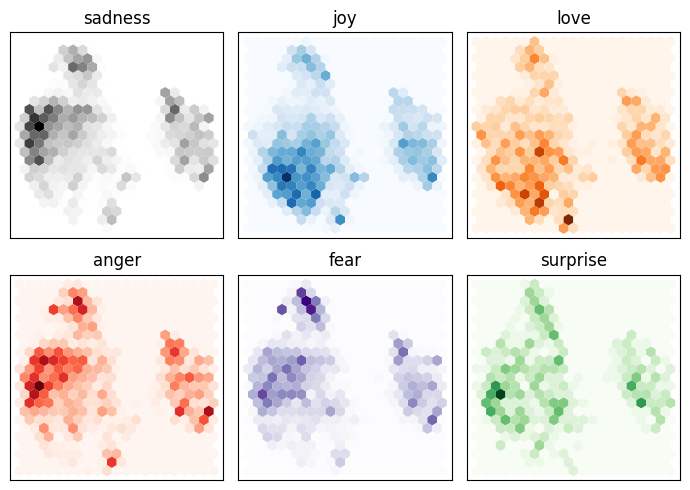

In [58]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [59]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.6325

In [60]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)


0.352

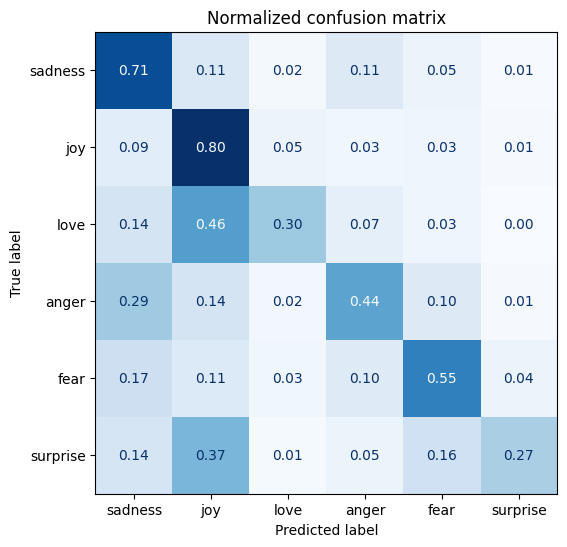

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

In [62]:
from transformers import AutoModelForSequenceClassification
num_labels = 6
model= (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [63]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [64]:
from huggingface_hub import notebook_login
notebook_login()

In [69]:

from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_enconded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  save_strategy="epoch",
                                  load_best_model_at_end=True,
                                  log_level="error")

/opt/conda/lib/python3.11/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [71]:

from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_enconded["train"],
                  eval_dataset=emotions_enconded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.813200,0.292316,0.908000,0.908184
2,0.236000,0.201563,0.929500,0.929446


In [72]:
preds_output = trainer.predict(emotions_enconded['validation'])

In [73]:
preds_output.metrics

{'test_loss': 0.20156268775463104,
 'test_accuracy': 0.9295,
 'test_f1': 0.9294461738386971,
 'test_runtime': 4.2194,
 'test_samples_per_second': 473.999,
 'test_steps_per_second': 7.584}

In [74]:
y_preds = np.argmax(preds_output.predictions , axis = 1)

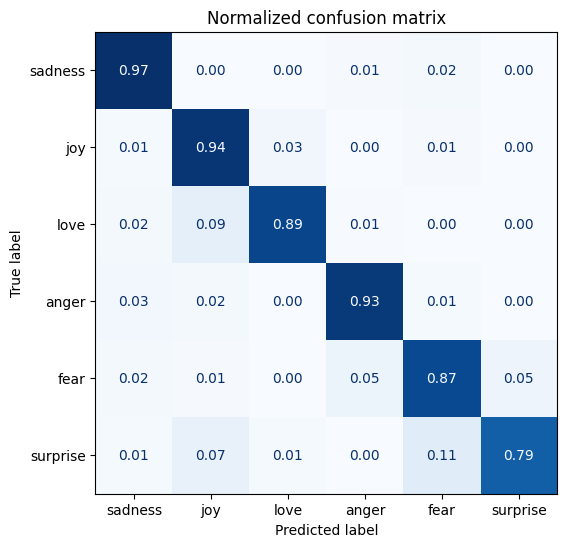

In [75]:
plot_confusion_matrix(y_preds,y_valid,labels)

In [77]:

from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # 모든 입력 텐서를 모델과 같은 장치로 이동합니다.
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device),
                             reduction="none")

    # 다른 데이터셋 열과 호환되도록 출력을 CPU로 옮깁니다.
    return {"loss": loss.cpu().numpy(),
            "predicted_label": pred_label.cpu().numpy()}

In [81]:

# 데이터셋을 다시 파이토치 텐서로 변환합니다.
emotions_enconded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])
# 손실 값을 계산합니다.
emotions_enconded["validation"] = emotions_enconded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [84]:
emotions_enconded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_enconded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(label_int2str))

In [85]:
df_test.sort_values("loss", ascending=False).head(10)


,text,label,predicted_label,loss
1963,i called myself pro life and voted for perry w...,joy,sadness,5.633858
1500,i guess we would naturally feel a sense of lon...,anger,sadness,5.451890
1950,i as representative of everything thats wrong ...,surprise,sadness,5.305404
1870,i guess i feel betrayed because i admired him ...,joy,sadness,5.196520
882,i feel badly about reneging on my commitment t...,love,sadness,5.018113
1111,im lazy my characters fall into categories of ...,joy,fear,4.934993
318,i felt ashamed of these feelings and was scare...,fear,sadness,4.792792
1509,i guess this is a memoir so it feels like that...,joy,fear,4.728156
1581,i feel stronger clearer but a little annoyed n...,anger,joy,4.622785
1274,i am going to several holiday parties and i ca...,joy,sadness,4.290321


In [86]:
df_test.sort_values("loss", ascending=True).head(10)


,text,label,predicted_label,loss
1466,i feel so ungrateful to be wishing this pregna...,sadness,sadness,0.016017
1452,i always feel guilty and come to one conclusio...,sadness,sadness,0.016353
1656,im feeling very jaded and uncertain about love...,sadness,sadness,0.016410
1310,i feel like an ungrateful asshole,sadness,sadness,0.016434
1861,im tired of feeling lethargic hating to work o...,sadness,sadness,0.016450
21,i feel try to tell me im ungrateful tell me im...,sadness,sadness,0.016485
1140,i do think about certain people i feel a bit d...,sadness,sadness,0.016570
1502,i feel ungrateful for stupid shit like,sadness,sadness,0.016641
1368,i started this blog with pure intentions i mus...,sadness,sadness,0.016647
133,i and feel quite ungrateful for it but i m loo...,sadness,sadness,0.016676


In [87]:
trainer.push_to_hub(commit_message="Training completed!!")

CommitInfo(commit_url='https://huggingface.co/OHCHANG/distilbert-base-uncased-finetuned-emotion/commit/4e72b9740ffbd6bbe510221501603fe99c57c6c5', commit_message='Training completed!!', commit_description='', oid='4e72b9740ffbd6bbe510221501603fe99c57c6c5', pr_url=None, repo_url=RepoUrl('https://huggingface.co/OHCHANG/distilbert-base-uncased-finetuned-emotion', endpoint='https://huggingface.co', repo_type='model', repo_id='OHCHANG/distilbert-base-uncased-finetuned-emotion'), pr_revision=None, pr_num=None)

In [88]:
from transformers import pipeline

# `haesun`를 자신의 허브 사용자 이름으로 바꾸세요.
model_id = "OHCHANG/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)

config.json:   0%|          | 0.00/883 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [91]:
custom_tweet = "I saw a movie today and it was really good."
preds = classifier(custom_tweet, top_k=None)

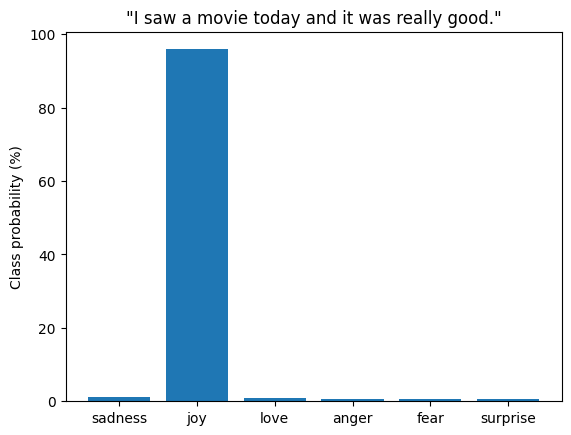

In [92]:
preds_sorted = sorted(preds, key=lambda d: d['label'])
preds_df = pd.DataFrame(preds_sorted)
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()

In [93]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 